In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
dataset = pd.read_csv("Dataset.csv")
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [10]:
print(x)

[[   49 86400]
 [   32 57600]
 [   35 64800]
 [   43 73200]
 [   45 14000]
 [   40 69600]
 [   34 62400]
 [   53 94800]
 [   55 99600]
 [   42 80400]]


In [11]:
print(y)

[1 1 0 0 1 0 0 1 0 1]


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [13]:
print(x_train)

[[   42 80400]
 [   32 57600]
 [   34 62400]
 [   53 94800]
 [   43 73200]
 [   49 86400]
 [   40 69600]]


In [14]:
print(x_test)

[[   35 64800]
 [   55 99600]
 [   45 14000]]


In [15]:
print(y_train)

[1 1 0 1 0 1 0]


In [16]:
print(y_test)

[0 0 1]


In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [18]:
print(x_train)

[[ 0.02053254  0.44897083]
 [-1.4167452  -1.41706417]
 [-1.12928965 -1.0242147 ]
 [ 1.60153805  1.62751925]
 [ 0.16426031 -0.14030338]
 [ 1.02662695  0.94003267]
 [-0.26692301 -0.43494049]]


In [19]:
print(x_test)

[[-0.98556187 -0.82778996]
 [ 1.88899359  2.02036872]
 [ 0.45171586 -4.98544689]]


In [20]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [21]:
y_pred = classifier.predict(x_test)

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1 1]
 [0 1]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


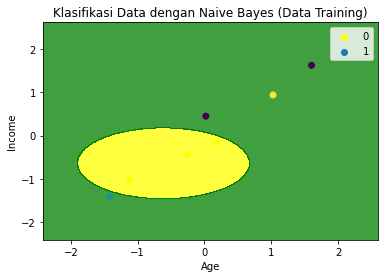

In [23]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],
              c = ListedColormap(('yellow', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan Naive Bayes (Data Training)')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


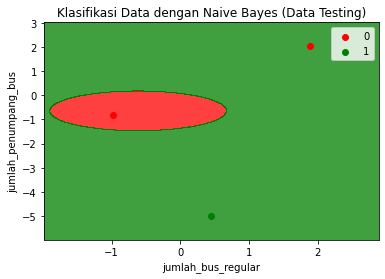

In [24]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan Naive Bayes (Data Testing)')
plt.xlabel('jumlah_bus_regular')
plt.ylabel('jumlah_penumpang_bus')
plt.legend()
plt.show()